In [6]:
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from beakerx import *
plt.style.use('ggplot')
import seaborn as sns
sns.set()
import h5py
import os
from tqdm import tqdm_notebook as tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from beakerx import *
plt.style.use('ggplot')
import seaborn as sns
sns.set()
import h5py
import os
from tqdm import tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


# Mask1 
- Mip level 2 16,16 ,30  (**does it matter?**)
- set to window, record coordinates
    - 0-80: 10809-20685  5448-11102
    - 81-144 9200-19076   4649-10303
    - 145-182 8193-18069  4104-9758
    - 183-219  7337-17213  3792-9446
    - 220-265 6496-16372  3584-9238
    - 266-292   55509-15385    3241-8895
    - 293-300 4590-14466   2914-8568
- bad slices record, replace by the previous layer

In [3]:
cd /home/xupeng/projects/membrane/

/home/xupeng/projects/membrane


In [4]:
ls data/mask1/

mask1_em.h5  png/


In [16]:
emdata = {}
for i in tqdm(range(301)):
    emdata[i] = scipy.misc.imread('data/mask1/KK_mask1_em_export_s'+'{0:03}'.format(i)+'.png')

100%|██████████| 301/301 [00:09<00:00, 31.62it/s]


In [13]:
styles = ["white","dark",'whitegrid',"darkgrid"]
contexts = ['paper','talk','poster','notebook']
sns.set_context(contexts[0])
sns.set_style(styles[0])

In [7]:
uniqueind = np.unique(emdata[0].reshape(-1,3),axis=0)

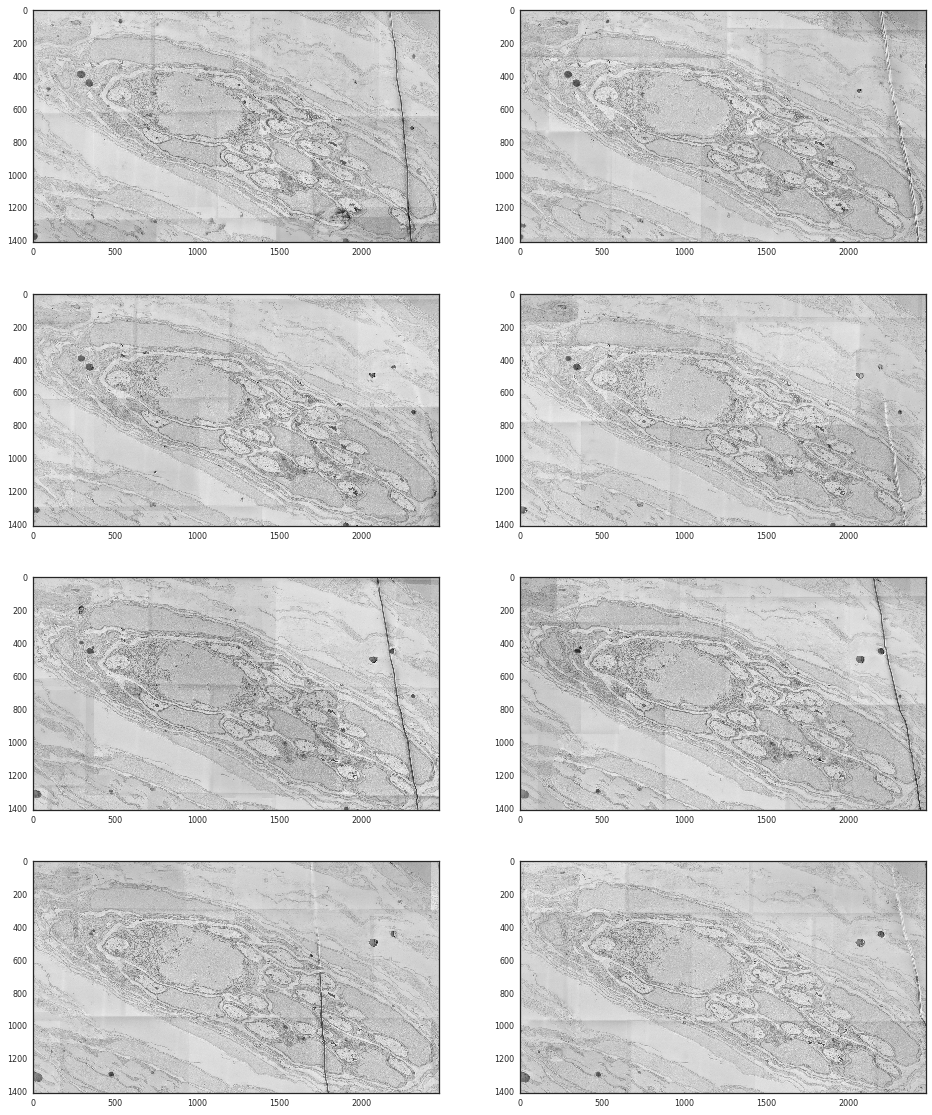

In [17]:
row = 4
fig,ax=plt.subplots(row,2,figsize=(16,5*row))
for i in range(row):
    for j in range(2):
        #xmin, xmax, ymin, ymax = find_bounding(segdata[i*2+j])
        ax[i,j].imshow(emdata[i*2+j])

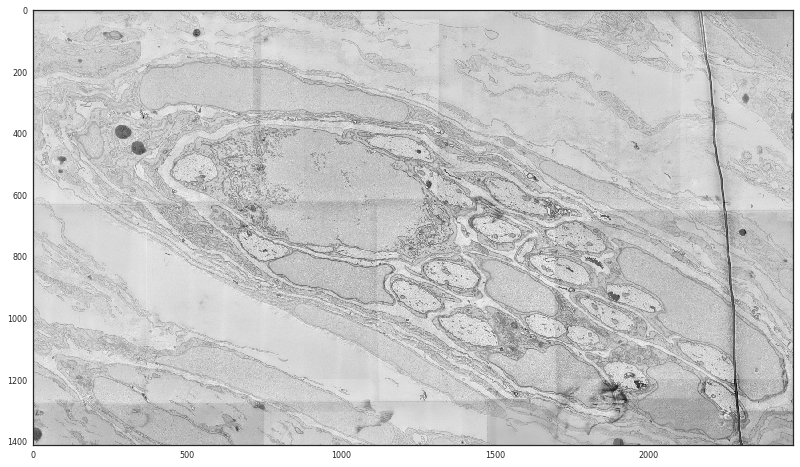

In [18]:
fig,ax=plt.subplots(1,figsize=(16,8))
ax.imshow(emdata[0])

In [19]:
for i in tqdm(range(301)):
    print (emdata[i].shape)

100%|██████████| 301/301 [00:00<00:00, 25255.77it/s]

(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2469, 3)
(1413, 2

In [25]:
normalized_data = np.ndarray([301,1413, 2469])
for i in tqdm(range(301)):
    normalized_data[i] = emdata[i][:,:,0]

100%|██████████| 301/301 [00:02<00:00, 100.55it/s]


In [26]:
with h5py.File('mask1_em.h5') as f:
    f.create_dataset('main',data=normalized_data,dtype=uint8)

### 8.5  resolution is important. export mip3 and 4!

In [5]:
ls data/mask1/mask1_mip3/

KK_mask1_em_export_s000.png  KK_mask1_em_export_s041.png
KK_mask1_em_export_s001.png  KK_mask1_em_export_s042.png
KK_mask1_em_export_s002.png  KK_mask1_em_export_s043.png
KK_mask1_em_export_s003.png  KK_mask1_em_export_s044.png
KK_mask1_em_export_s004.png  KK_mask1_em_export_s045.png
KK_mask1_em_export_s005.png  KK_mask1_em_export_s046.png
KK_mask1_em_export_s006.png  KK_mask1_em_export_s047.png
KK_mask1_em_export_s007.png  KK_mask1_em_export_s048.png
KK_mask1_em_export_s008.png  KK_mask1_em_export_s049.png
KK_mask1_em_export_s009.png  KK_mask1_em_export_s050.png
KK_mask1_em_export_s010.png  KK_mask1_em_export_s051.png
KK_mask1_em_export_s011.png  KK_mask1_em_export_s052.png
KK_mask1_em_export_s012.png  KK_mask1_em_export_s053.png
KK_mask1_em_export_s013.png  KK_mask1_em_export_s054.png
KK_mask1_em_export_s014.png  KK_mask1_em_export_s055.png
KK_mask1_em_export_s015.png  KK_mask1_em_export_s056.png
KK_mask1_em_export_s016.png  KK_mask1_em_export_s057.png
KK_mask1_em_export_s017.png  KK

In [9]:
emdata_mip3 = {}
for i in tqdm(range(81)):
    emdata_mip3[i] = scipy.misc.imread('data/mask1/mask1_mip3/KK_mask1_em_export_s'+'{0:03}'.format(i)+'.png')

In [10]:
uniqueind = np.unique(emdata_mip3[0].reshape(-1,3),axis=0)

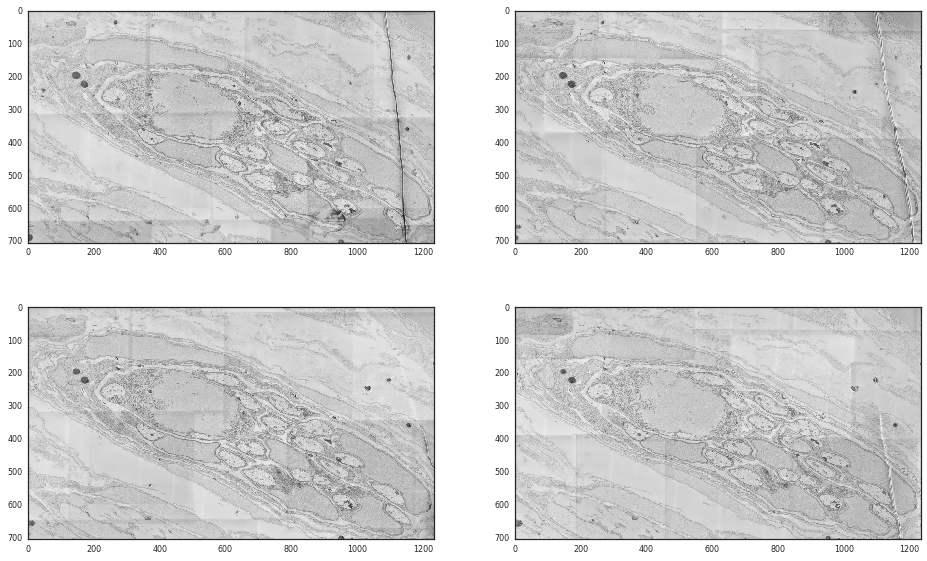

In [14]:
row = 2
fig,ax=plt.subplots(row,2,figsize=(16,5*row))
for i in range(row):
    for j in range(2):
        #xmin, xmax, ymin, ymax = find_bounding(segdata[i*2+j])
        ax[i,j].imshow(emdata_mip3[i*2+j])

In [15]:
for i in tqdm(range(301)):
    print (emdata_mip3[i].shape)

(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234, 3)
(706, 1234

KeyError: 81

In [16]:
emdata_mip4 = {}
for i in tqdm(range(81)):
    emdata_mip4[i] = scipy.misc.imread('data/mask1/mask1_mip4/KK_mask1_em_export_s'+'{0:03}'.format(i)+'.png')

In [17]:
for i in tqdm(range(81)):
    print (emdata_mip4[i].shape)

(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 617, 3)
(353, 

In [18]:
normalized_data = np.ndarray([81,353, 617])
for i in tqdm(range(81)):
    normalized_data[i] = emdata_mip4[i][:,:,0]

In [20]:
with h5py.File('data/mask1/mask1_em_mip4.h5') as f:
    f.create_dataset('main',data=normalized_data,dtype=uint8)